In [1]:
# Modificado por Carlos Simón Hernández
#0) Importamos librerias antes de esto había que instalar EEGRAPH
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import eegraph
import os

In [2]:
#1) Leemos los datos de las EEGs de pacientes y lo transformamos a grafos de Networkx con EEGRAPH
#============================================================================================================================================================================

def search(values, searchFor):
    for k in values:
        if (searchFor == k):
            return (values[k])

    
def search_key(values, searchFor):
    for key, value in values.items():
        if value[0] == searchFor:
            return key
          
    
def test_empty(graphs, conn_empty_values, conn):
    conn_empty_aux = [0] * len(conn_empty_values)
    for i in range(len(graphs)):
        if(nx.is_empty(graphs[i])):
            conn_empty_aux[conn] += 1
    
    conn_empty_values[conn] = conn_empty_values[conn] + conn_empty_aux[conn]
    print('Empty:',conn_empty_values,'\n')
    return conn_empty_values   
    
    
def modelate_with_different_connectivity(window_size, label, connectivity_number_total, G, conn_empty_values):
    total_graphs_class_0, total_graphs_class_1  = [], []
    for i in range(connectivity_number_total):
        conn = search_key(connectivity_measures, i)
        bands = search(connectivity_measures, conn)[1]
        
        # The threshold can be omited to use the default one
        # Reduzco el umbral para que pasen más cantidad de aristas y así haya más cantidad de información en los grafos.
        graphs, _ = G.modelate(window_size = window_size, connectivity = conn, bands = bands, threshold = 0.6)  

        conn_empty_values = test_empty(graphs, conn_empty_values, i)
        
        if(int(label)):
            total_graphs_class_1 = total_graphs_class_1 + list(graphs.values())    
        
        else:
            total_graphs_class_0 = total_graphs_class_0 + list(graphs.values())
            

    return total_graphs_class_0, total_graphs_class_1, conn_empty_values


def open_data_directories(path, window_size_class_0, window_size_class_1, connectivity_number_total, exclude=[None]):
    conn_empty_values = [0] * connectivity_number_total
    graphs_class_0, graphs_class_1 = [], []
    class_files = os.listdir(path)
    for entry in class_files:
        eeg_files = os.listdir(path + '/' + entry)
        for eeg in eeg_files:
            eeg_path = (path + '/' + entry + '/' + eeg)
            print(eeg_path, entry)
            G = eegraph.Graph() 
            G.load_data(path= eeg_path, exclude = exclude)
            
            if(entry == '1'):     # Number 1 corresponds to "espasmo" data
                window_size = window_size_class_1
            elif (entry == '0'):  # Number 0 corresponds to "presalva" data
                window_size = window_size_class_0
            
            print('\n=========================================')
            final_graphs_class_0, final_graphs_class_1 , conn_empty_values = modelate_with_different_connectivity(window_size=window_size,
                                                                                                                label=entry,
                                                                                                                connectivity_number_total=con_number_total, 
                                                                                                                G=G, 
                                                                                                                conn_empty_values=conn_empty_values)
            
            graphs_class_0 = graphs_class_0 + final_graphs_class_0
            graphs_class_1 = graphs_class_1 + final_graphs_class_1
        
    return graphs_class_0, graphs_class_1


"""   
connectivity_measures = {'cross_correlation': (0, [None]), 'pearson_correlation': (1, [None]), 'squared_coherence': (2, ['delta', 'theta', 'alpha', 'beta']),
                         'imag_coherence': (3, ['delta', 'theta', 'alpha', 'beta']), 'corr_cross_correlation': (4, [None]), 'wpli': (5, ['delta', 'theta', 'alpha', 'beta']), 
                         'plv': (6, ['delta', 'theta', 'alpha', 'beta']), 'pli': (7, [None]),
                         'power_spectrum': (8, ['delta', 'theta', 'alpha', 'beta']), 'spectral_entropy': (9, ['delta', 'theta', 'alpha', 'beta']), 
                         'shannon_entropy': (10, [None])}     

"""
 
connectivity_measures = {'pearson_correlation': (0, [None])}   #CONNECTIVITY MEASURES USED


path = 'data'                                                         #<--------------- PATH TO FOLDER CONTAINING EEGs
window_size_class_0 = 1                                               #<--------------- CLASS 0 WINDOW SIZE
window_size_class_1 = 1                                               #<--------------- CLASS 1 WINDOW SIZE
con_number_total = 1                                                  #<--------------- NUMBER OF CONNECTIVITY MEASURES USED, MUST BE THE SAME AS LENGTH OF DICTIONARY 'connectivity_measures'
graphs_class_0, graphs_class_1 = open_data_directories(path, window_size_class_0, window_size_class_1, con_number_total) 
print('\n=========================================')
print('Total graphs Generated for class 0: ', len(graphs_class_0))
print('Total graphs Generated for class 1: ', len(graphs_class_1))
graphs = [graphs_class_0, graphs_class_1]

data/0/1_presalva_1.edf 0
Extracting EDF parameters from C:\Users\charl\OneDrive\UNIVERSIDAD TERCERO\DATA MINING\Seminario\data\0\1_presalva_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 10.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2048.0), (2048.0, 2560.0), (2560.0, 3072.0), (3072.0, 3584.0), (3584.0, 4096.0), (4096.0, 4608.0), (4608.0, 5120.0), (5120.0, 5631.0)]

Threshold: 0.6
Number of graphs created: 11
Empty: [0] 

data/0/1_presalva_10.edf 0
Extracting EDF parameters from C:\Users\charl\OneDrive\UNIVERSIDAD TERCERO\DATA MINING\Seminario\data\0\1_presalva_10.edf...
EDF file d

In [3]:
#2) Visualizamos los grafos.
#============================================================================================================================================================================

def visualize_graphs(graphs, selected):
    G = eegraph.Graph() 
    for i in range(selected[0], selected[1]+1):
        G.visualize(graphs[i])
    
    
wanted = [0, 0]   # Graph position 
#Escogemos el grafo cuando tienen un ataque epiléptico.
visualize_graphs(graphs_class_1, wanted)

<font color="blue">Viendo el plot, observamos que hay más aristas, debido al threshold que hemos cambiado.</font>

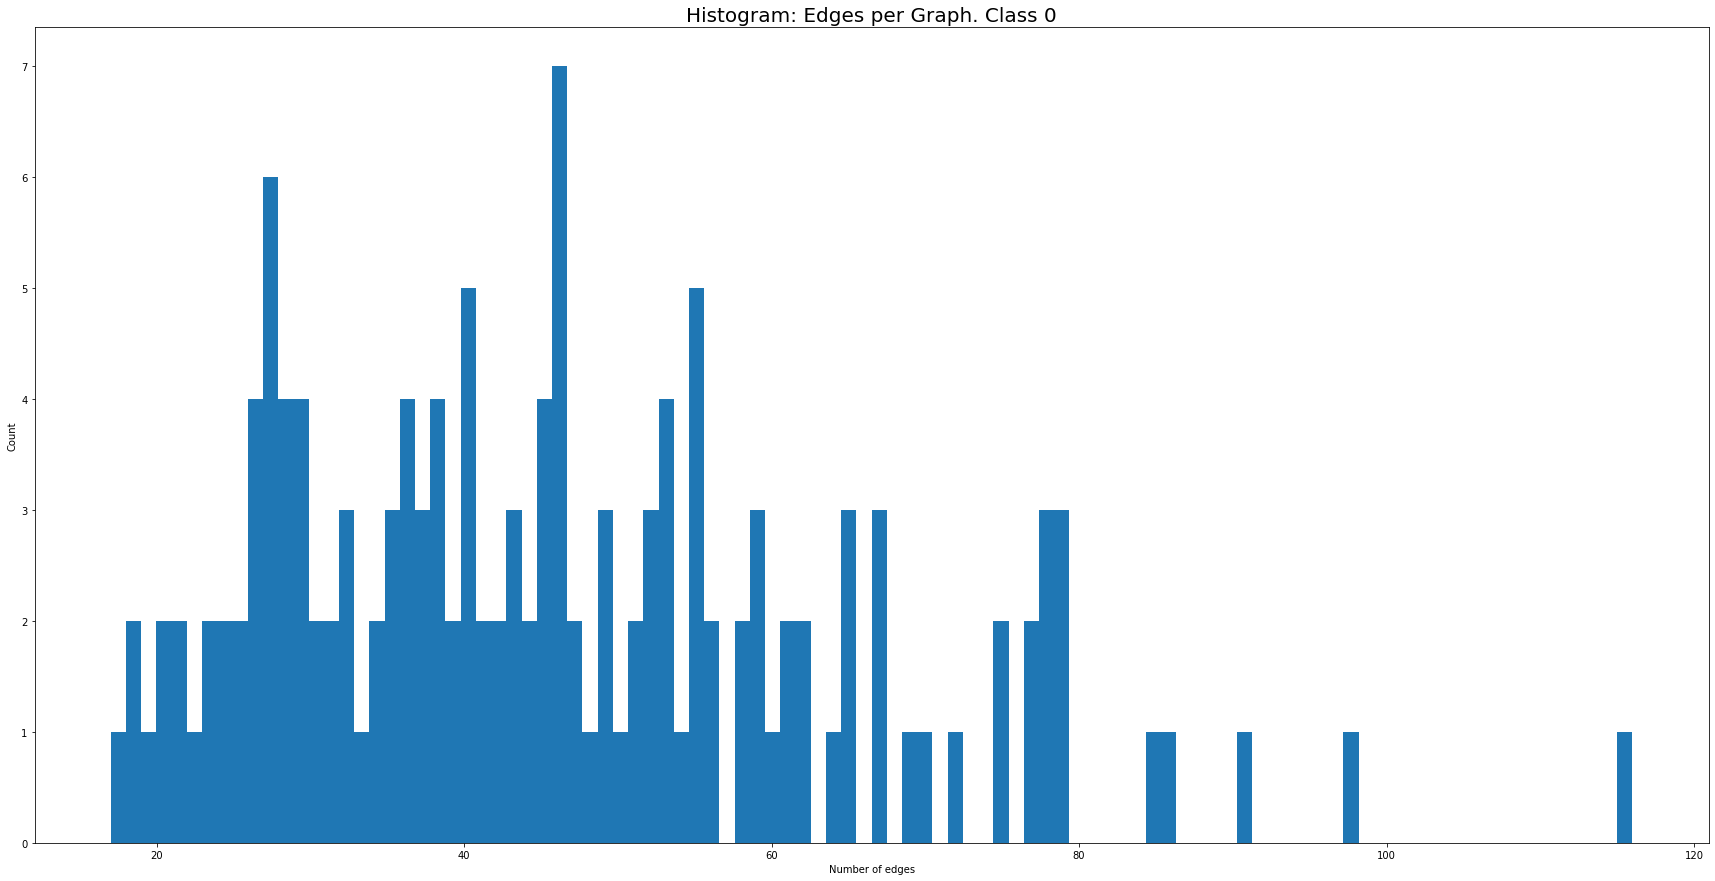

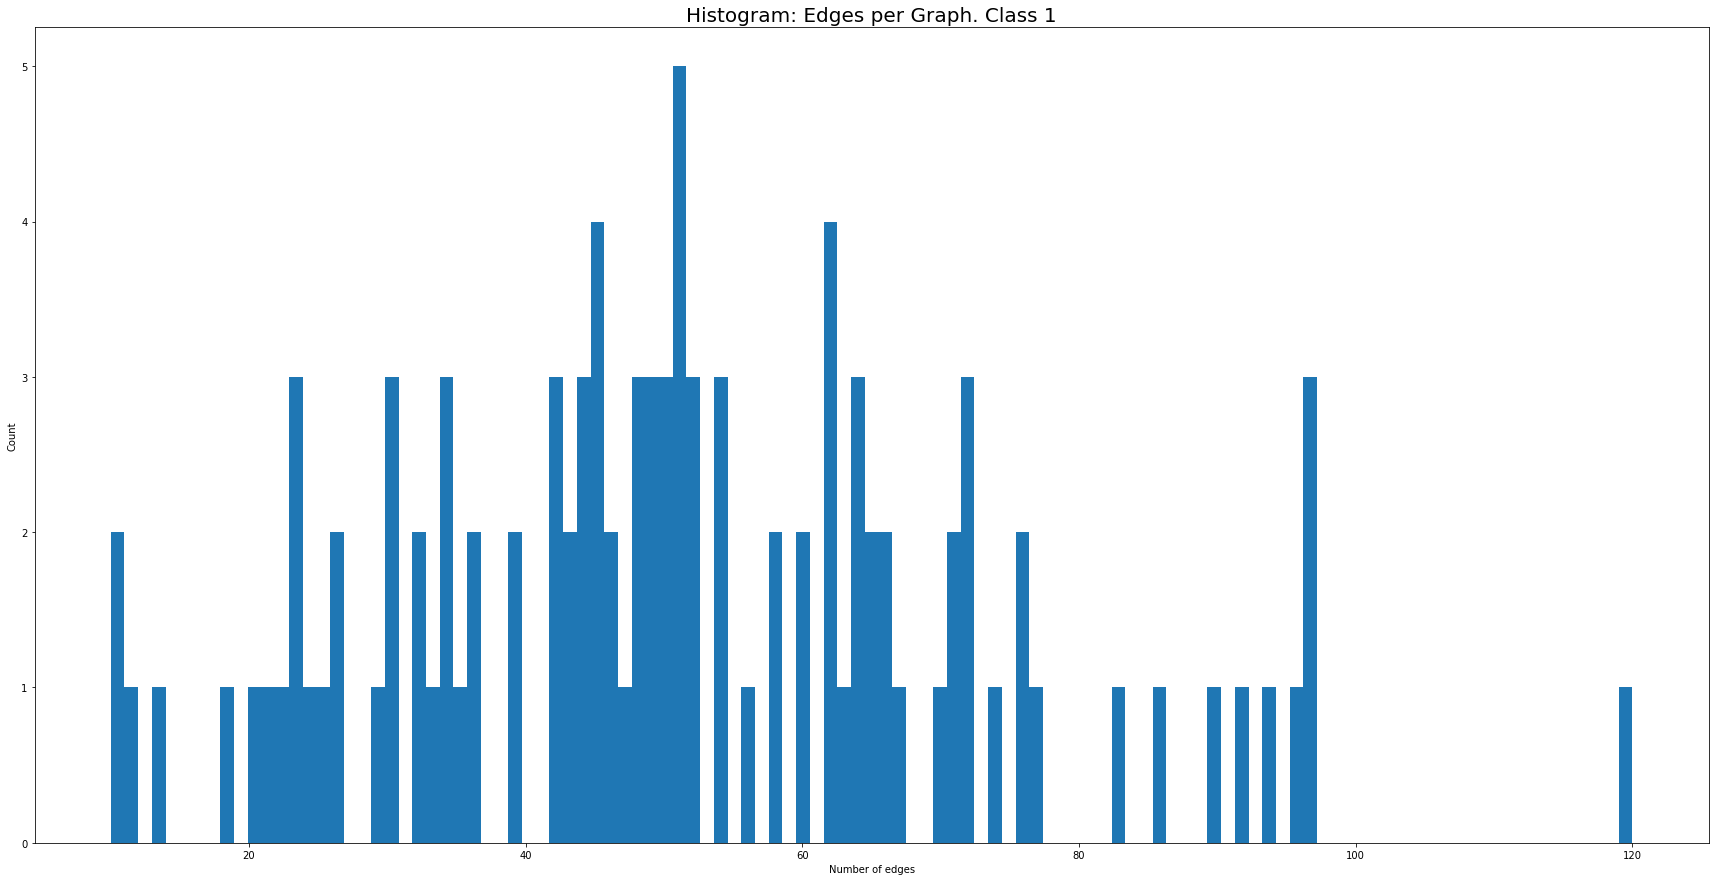

In [4]:
#3)Elaboramos un histograma para ver si los grafos contienen suficiente información.
#============================================================================================================================================================================

def edges_histogram(graphs, label):
    total_edges, edges_dict = [], {}
    for i in range(len(graphs)):
        edges = [e for e in graphs[i].edges]
        edges_dict[str(i+1)] = len(edges)
        
    keys = edges_dict.keys()
    values = edges_dict.values()
    plt.figure(figsize=(30,15))
    plt.title('Histogram: Edges per Graph. Class ' + str(label), fontsize=20)
    plt.hist(values, bins=max(values)+1-min(values))
    plt.xlabel('Number of edges')
    plt.ylabel('Count')
    #plt.bar(keys, values, align='center')
    plt.show()

    
print('\n=====================================================================')       
for j in range(2):
    edges_histogram(graphs[j], j)

<font color="blue">Al haber disminiudo el umbral (Threshold) a 0.6 se puede observar en el histograma, que los grafos se han desplazado más al centro respecto al Threshold utilizado anteriormente (0.9), por lo que se llega a la conclusión de que los grafos generados tienen más información.</font>

In [5]:
#4)Identificamos los datos nulos
#============================================================================================================================================================================

def empty_graphs(graphs):
    empty_graphs, empty_dict = 0, {}
    for i in range(len(graphs)):
        if(nx.is_empty(graphs[i])):
            empty_dict[i] = True
            empty_graphs += 1
        else:
            empty_dict[i] = False
    
    return empty_graphs, empty_dict
    
print('\n=====================================================================') 
empty_amount, graphs_dict = [None]*2, [None]*2
for j in range(2):
    empty_amount[j], graphs_dict[j] = empty_graphs(graphs[j])
    print('\nNumber of Empty graphs. Class ' + str(j) + ': ' , empty_amount[j])
    print('Empty graphs (True).', graphs_dict[j])



Number of Empty graphs. Class 0:  0
Empty graphs (True). {0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False, 8: False, 9: False, 10: False, 11: False, 12: False, 13: False, 14: False, 15: False, 16: False, 17: False, 18: False, 19: False, 20: False, 21: False, 22: False, 23: False, 24: False, 25: False, 26: False, 27: False, 28: False, 29: False, 30: False, 31: False, 32: False, 33: False, 34: False, 35: False, 36: False, 37: False, 38: False, 39: False, 40: False, 41: False, 42: False, 43: False, 44: False, 45: False, 46: False, 47: False, 48: False, 49: False, 50: False, 51: False, 52: False, 53: False, 54: False, 55: False, 56: False, 57: False, 58: False, 59: False, 60: False, 61: False, 62: False, 63: False, 64: False, 65: False, 66: False, 67: False, 68: False, 69: False, 70: False, 71: False, 72: False, 73: False, 74: False, 75: False, 76: False, 77: False, 78: False, 79: False, 80: False, 81: False, 82: False, 83: False, 84: False, 85: False, 86: 

In [6]:
#5)Eliminamos los datos nulos
#============================================================================================================================================================================

def delete_graphs(graphs, graphs_dict):
    for key,value in reversed(graphs_dict.items()):
        if(value):
            print('Deleting graph in index:', str(key))
            del graphs[key]
    return graphs


print('\n=====================================================================') 
print('Deleting empty graphs.')
for j in range(2):
    if (empty_amount[j]):
        print('\nGraphs in Class', j, ':')
        graphs[j] = delete_graphs(graphs[j], graphs_dict[j])

        
print('\nTotal graphs for class 0: ', len(graphs[0]))
print('Total graphs for class 1: ', len(graphs[1]))


Deleting empty graphs.

Total graphs for class 0:  143
Total graphs for class 1:  103


In [7]:
#6)Calculamos el valor medio de las aristas de cada clase y su desviación estándar
#============================================================================================================================================================================
def mean_std(graphs):
    edges_weights, edges_dict = [], {}
    for i in range(len(graphs)):
        edges = [d.get('weight') for e1,e2,d in graphs[i].edges(data=True)]
        edges_weights = edges_weights + edges

    print('Mean:', round(np.mean(edges_weights),5))
    print('STD:', round(np.std(edges_weights),5))
    
    
print('\n=====================================================================')
print('Mean values and Standar Deviation for edges in the graphs.')
for j in range(2):
    print('\nClass', j, ':')
    mean_std(graphs[j])


Mean values and Standar Deviation for edges in the graphs.

Class 0 :
Mean: 0.75025
STD: 0.09681

Class 1 :
Mean: 0.79018
STD: 0.10959


<font color="blue">Viendo estos datos, llegamos a la conclusión de que la clase 0 (Reposo) tiene menos correlación que la clase 1 (Ataque epiléptico), con lo que las zonas del cerebro se sincronizan cuando un paciente con epilepsia sufre un ataque. Y vemos que la media de las aristas de la clase 0 es menor que las de la clase 1, por que hay menos.</font>